# Convolutions
In this notebook I will go over some basic convolutions. My first example is an example of a 1D convolution. First I will do a convolution using the `numpy` library then I will show a convolution 1D convolution done  manually. 1D convolutions are for 1 dimensional data such as a single array or a function. 2D convolutions are more generally done on something like a image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

# 1D Convolution
A convolution in its simples form is when we have an array and multiply it over another one and we add those values to create a new array. Here I will do a simple 1D convolution in one line to demonstrate that when we do a convolution we will get a different array. The function `np.convolve()` works like this  `np.convolve(array, kernel, padding)`. The array is the array we want to perform a convolution on. The kernel will be what we perform it with. The padding will either add zeroes to the end or wont. Lastly this will print out a new array. Once I did this I wanted to create my own function which does the same and can be seen below. I tested the functions with the same values. 

In [2]:
np.convolve([1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0], [0.1, 0.2], 'same') # doing a 1D convolution with numpy

array([0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2])

In [3]:
def preform1DConvolution(kernel, arr):
    """
    
    """
    result = []
    for i in range(len(arr)-len(kernel)):
        res = kernel[1] * arr[i] + kernel[0] * arr[i+1]
        result.append(round(res,1))
    return result

In [4]:
arrayOne = [0.1, 0.2,]
arrayTwo = [0, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0, 0]

In [5]:
preform1DConvolution(arrayOne, arrayTwo) 

[0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2]

# 2D Convolutions
Similar to a 1D convolution a 2D convolution is when we have a array/kernel and we move it over another array and multiply and add as we go along. The difference is we now have a 2D array. In this section I create a function that will take two inputs a kernel and a 2D array and return a new array. After that I will use this function to preform convolutions on a image. Here is a function that prefroms 2D convolutions. Here we will use this function to try add a filter over some images. 

In [6]:
def preform2DConvolution(kernel, arr):
    """
    from row 0 to row 3, the 0 column
    print(arr[0:3:,0])
    
    from row 0 to row 3, the 1 column
    print(arr[0:3:,1])

    from row 0 to row 3, the 2 column
    print(arr[0:3:,2])

    """
    newArr = []
    rows, cols, = arr.shape[0], arr.shape[1]
    height = len(kernel)

    for x in range(0, rows-(len(kernel)-1)):
        listOfPixels = []
        for y in range(0, cols-(len(kernel)-1)):
            oneP = np.multiply(arr[x:x+height:,y], kernel[0:height:,0]) 
            twoP = np.multiply(arr[x:x+height:,y+1], kernel[0:height:,1])
            threeP = np.multiply(arr[x:x+height:,y+2], kernel[0:height:,2]) 
            
            pixel = sum(oneP) + sum(twoP) + sum(threeP)
            listOfPixels.append(pixel)
        
        newArr.append(listOfPixels)
        
    return np.array(newArr)

In [7]:
# my simple 2D array
simpleImg = np.array([[3, 3, 2, 1, 0],[0, 0, 1, 3, 1], [3, 1, 2, 2, 3], [2, 0, 0, 2, 2], [2, 0, 0, 0, 1]])
# the kernel we will use on the image
simpleKernel = np.array([[0, 1, 2],[2, 2 , 0], [0, 1, 2]])

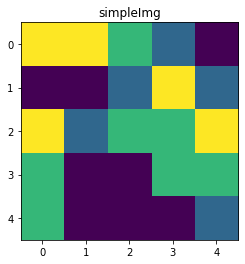

In [8]:
plt.imshow(simpleImg)
plt.title('simpleImg')
plt.show()

In [9]:
newImg = preform2DConvolution(simpleKernel, simpleImg)

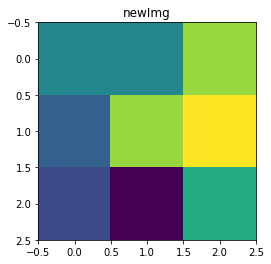

In [10]:
plt.imshow(newImg)
plt.title('newImg')
plt.show()

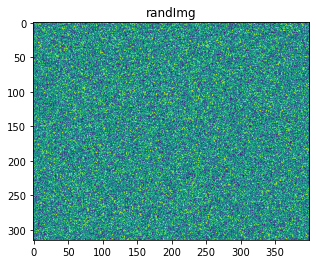

In [11]:
randImg = np.random.randint(1000, size=(315, 400))
plt.imshow(randImg)
plt.title('randImg')
plt.show()

In [12]:
newRandImg = preform2DConvolution(simpleKernel, randImg)

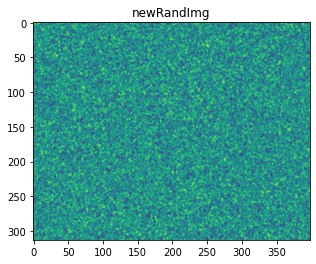

In [13]:
plt.imshow(newRandImg)
plt.title('newRandImg')
plt.show()

# Performing Convolutions on Images
Here I will show how convolutions can be used on images. I will use a photo I have saved and display how it looks in its true colored form. I will then make the original colored image into a black and white image. I need to turn the colored image inot a black and white image because the colored image has three dimensions and my function performs 2D convolutions only. Once it is in black and white I will then apply a filter to it and display it as well

In [14]:
imgOfBernie = cv2.imread("bernieMuni.jpg", 3)
b,g,r = cv2.split(imgOfBernie)
bernie = cv2.merge([r,g,b])

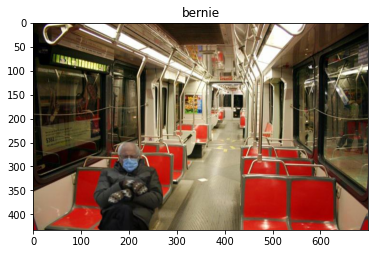

In [15]:
plt.imshow(bernie)
plt.title('bernie')
plt.show()

In [21]:
copyOfBernie = bernie.copy()
grayBernie = cv2.cvtColor(copyOfBernie, cv2.COLOR_BGR2GRAY)
# check shape of array
grayBernie.shape

(433, 700)

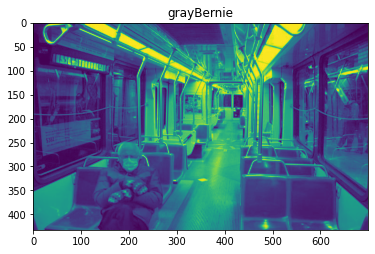

In [17]:
plt.imshow(grayBernie)
plt.title('grayBernie')
plt.show()

In [19]:
horizontalSobelKernel = np.array([[1, 0, -1],[2, 0 , -2], [1, 0, -1]]) 
filterdBernie = preform2DConvolution(horizontalSobelKernel, grayBernie) # apply the kernel to the bernie image

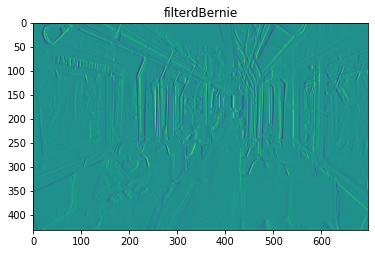

In [20]:
plt.imshow(filterdBernie)
plt.title('filterdBernie')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras